In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cell_df = pd.read_csv('image_bins.csv')
cell_df.head()

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,Class
0,3534,0,0,0,0,0,0,10390,0
1,4227,0,0,0,0,0,0,11140,0
2,3771,0,0,0,0,0,0,11215,0
3,4014,0,0,0,0,0,0,12628,0
4,3819,0,0,0,0,0,0,12691,0


In [3]:
cell_df.tail()

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,Class
2017,4435,12,0,0,0,43,0,12002,1
2018,3545,0,0,0,35,37,0,11387,1
2019,2256,0,0,0,0,0,0,5206,1
2020,4488,0,0,0,0,149,0,9923,1
2021,3348,10,0,0,0,112,0,10790,1


In [4]:
cell_df.shape

(2022, 9)

In [5]:
cell_df.size

18198

In [6]:
cell_df.count()

Bins0    2022
Bins1    2022
Bins2    2022
Bins3    2022
Bins4    2022
Bins5    2022
Bins6    2022
Bins7    2022
Class    2022
dtype: int64

In [7]:
cell_df['Class'].value_counts()

1    1501
0     521
Name: Class, dtype: int64

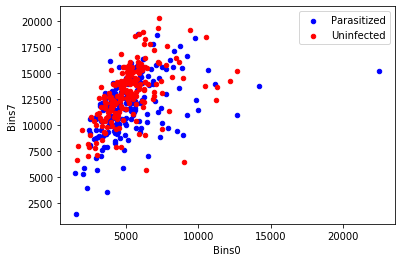

In [8]:
#Distribution of the classes
parasitized_df = cell_df[cell_df['Class']==1][0:200]
uninfected_df = cell_df[cell_df['Class']==0][0:200]

axes = parasitized_df.plot(kind='scatter', x='Bins0',y='Bins7',color='blue',label='Parasitized')
uninfected_df.plot(kind='scatter', x='Bins0',y='Bins7',color='red',label='Uninfected', ax=axes)


In [9]:
#Identifying Unwanted Rows
cell_df.dtypes

Bins0    int64
Bins1    int64
Bins2    int64
Bins3    int64
Bins4    int64
Bins5    int64
Bins6    int64
Bins7    int64
Class    int64
dtype: object

In [10]:
#Remove unwanted columns
cell_df.columns
#Creating a Feature Dataframe
feature_df = cell_df[['Bins0', 'Bins1', 'Bins2', 'Bins3', 'Bins4', 'Bins5', 'Bins6', 'Bins7']]

# Cel_df 100 rows and 11 columns
#Only Picked 9 columns out of 11

#Independent Variable
X = np.asarray(feature_df)

#Dependent Variable
y = np.asarray(cell_df['Class'])

X[0:5]

array([[ 3534,     0,     0,     0,     0,     0,     0, 10390],
       [ 4227,     0,     0,     0,     0,     0,     0, 11140],
       [ 3771,     0,     0,     0,     0,     0,     0, 11215],
       [ 4014,     0,     0,     0,     0,     0,     0, 12628],
       [ 3819,     0,     0,     0,     0,     0,     0, 12691]],
      dtype=int64)

In [11]:
#Divide the data as Train/Test dataset
'''
cell_df --> Train (80 rows)/Test (20 rows)
Train(X,y) ##X is a 2D array ; 
Test(X,y) 
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

#1617 rows x 8 columns for training IV
X_train.shape

#1617 rows x 1 columns for training DV
y_train.shape

#405 rows x 8 columns for testing IV
X_test.shape

#405 rows x 1 columns for testing DV
y_test.shape

(405,)

In [12]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       110
           1       0.99      0.93      0.96       295

    accuracy                           0.94       405
   macro avg       0.91      0.95      0.93       405
weighted avg       0.95      0.94      0.94       405



In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[106   4]
 [ 20 275]]


In [17]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(classifier, 'svmbins.pkl') 

['svmbins.pkl']

In [35]:
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
import numpy as np
import cv2
 
def getbins(cell_image):
        a = np.array(cell_image[:,:,0], dtype = np.uint8)
        d = dict()
        for i in range (0,256):
            d[i]=0

        x = []
        for i in range (0,256):
            x.append(i)    

        y = []
        for i in range (0,256):
            y.append(d[i])
            
        num = 0
        den = 0
        for i in a.flatten():
            d[i] = d.get(i,0) + 1

        b = 0
        for i in x:
            b = d.get(i,0) + 1
            num = num + b*i
            den = den + b
        cogr = num / den
        
        a = np.array(cell_image[:,:,1], dtype = np.uint8)
        d = dict()
        for i in range (0,256):
            d[i]=0

        x = []
        for i in range (0,256):
            x.append(i)    

        y = []
        for i in range (0,256):
            y.append(d[i])

        num = 0
        den = 0
        for i in a.flatten():
            d[i] = d.get(i,0) + 1

        b = 0
        for i in x:
            b = d.get(i,0) + 1
            num = num + b*i
            den = den + b
            cogg = num / den
        
        a = np.array(cell_image[:,:,2], dtype = np.uint8)
        d = dict()
        for i in range (0,256):
            d[i]=0

        x = []
        for i in range (0,256):
            x.append(i)    

        y = []
        for i in range (0,256):
            y.append(d[i])

        num = 0
        den = 0
        for i in a.flatten():
            d[i] = d.get(i,0) + 1

        b = 0
        for i in x:
            b = d.get(i,0) + 1
            num = num + b*i
            den = den + b
        cogb = num / den
        
        h, w, _ = cell_image.shape
        R, G, B = 0, 1, 2

        for color, cog in [(R, cogr), (G, cogg), (B, cogb)]:
            for r in range(h):
                for c in range(w):
                    if cell_image[r, c, color] <= cog:
                        cell_image[r, c, color] = 0
                    else:
                        cell_image[r, c, color] = 1
        
        bins0 = 0
        bins1 = 0
        bins2 = 0
        bins3 = 0
        bins4 = 0
        bins5 = 0
        bins6 = 0
        bins7 = 0
        for i in range(h):
            for j in range(w):
                r= cell_image[i,j,0];
                g= cell_image[i,j,1];
                b= cell_image[i,j,2];
        
                if r==0 and g==0 and b==0:
                        bins0= bins0 + 1
                elif r==0 and g==0 and b==1:
                        bins1= bins1 + 1
                elif r==0 and g==1 and b==0:
                        bins2= bins2 + 1
                elif r==0 and g==1 and b==1:
                        bins3= bins3 + 1
                elif r==1 and g==0 and b==0:
                        bins4= bins4 + 1
                elif r==1 and g==0 and b==1:
                        bins5= bins5 + 1
                elif r==1 and g==1 and b==0:
                        bins6= bins6 + 1
                elif r==1 and g==1 and b==1:
                        bins7= bins7 + 1
                        
        l=[]
        l.extend([bins0, bins1, bins2, bins3, bins4, bins5, bins6, bins7])
        
        return l

class Root(Tk):
    def __init__(self):
        super(Root, self).__init__()
        self.title("Python Tkinter Dialog Widget")
        self.minsize(640, 400)
        self.labelFrame = ttk.LabelFrame(self, text = "Open File")
        self.labelFrame.grid(column = 0, row = 1, padx = 20, pady = 20)
        self.button()
        self.button1() 
 
    def button(self):
        self.button = ttk.Button(self.labelFrame, text = "Browse A File",command = self.fileDialog)
        self.button.grid(column = 1, row = 1)
  
    def fileDialog(self):
        self.filename = filedialog.askopenfilename(initialdir =  "/", title = "Select A File", filetype =
        (("png files","*.png"),("all files","*.*")) )
        self.label = ttk.Label(self.labelFrame, text = "")
        self.label.grid(column = 1, row = 2)
        self.label.configure(text = self.filename)
 
    def button1(self):
        self.button = ttk.Button(self.labelFrame, text = "submit", command = self.get_prediction)
        self.button.grid(column = 1, row = 20)
        
    
    def get_prediction(self):
        my_image = cv2.imread(self.filename)
        dst = cv2.fastNlMeansDenoisingColored(my_image,None,10,10,7,29)
        h = getbins(dst)
        y=classifier.predict([h])
        if(y==1):
            self.label.configure(text="The Image is Parasitic")
        else:
            self.label.configure(text="The Image is Non-Parasitic") 
root = Root()
root.mainloop()